In [224]:
import boto3
import pandas as pd

bucket = "ml-for-bem"
bucket_prefix = "hatchet"
experiment_id = "test/progressive-training-20"

s3 = boto3.client("s3")

# list all the files in the experiment directory that have "train" and "results" and "h5" in the key
files = s3.list_objects(Bucket=bucket, Prefix=f"{bucket_prefix}/{experiment_id}")[
    "Contents"
]

# filter the files to only include the ones that have "train" and "results" and "h5" in the key
train_results_files = [
    file
    for file in files
    if "train/" in file["Key"] and "results" in file["Key"] and "h5" in file["Key"]
]
sample_results_files = [file for file in files if "full-dataset.pq" in file["Key"]]


file_keys = [file["Key"] for file in train_results_files]
import tempfile
from pathlib import Path

all_dfs = []
with tempfile.TemporaryDirectory() as temp_dir:
    for i, file in enumerate(file_keys):
        local_path = Path(temp_dir) / f"result_{i}.h5"
        s3.download_file(Bucket=bucket, Key=file, Filename=local_path.as_posix())
        df = pd.read_hdf(local_path.as_posix(), key="stratum_metrics")
        all_dfs.append(df)

df = pd.concat(all_dfs)
df


split_segment                                                                               train  \
stratum                                 USA_CT_Hartford-Bradley.Intl.AP.725080_TMYx.2007-2021.zip   
metric                                                                                        mae   
target                                                                           District Cooling   
sort_index progressive_training_iter_ix                                                             
0          0                                                                      0.177933          
1          0                                                                      0.177862          
2          0                                                                      0.593644          
3          0                                                                      0.609434          
4          0                                                                      0.188374          
0          1                                                                      0.836093          
1          1                                                                      0.691254          
2          1                                                                      0.353555          
3          1                                                                      0.314730          
4          1                                                                      1.129962          
0          2                                                                      0.663216          
1          2                                                                      0.729094          
2          2                                                                      0.797561          
3          2                                                                      0.555032          
4          2                                                                      1.017506          
0          3                                                                      0.519961          
1          3                                                                      0.988626          
2          3                                                                      0.508709          
3          3                                                                      0.647431          
4          3                                                                      1.024806          
0          4                                                                      0.905950          
1          4                                                                      0.647738          
2          4                                                                      0.793607          
3          4                                                                      0.652884          
4          4                                                                      1.006678          

split_segment                                                                \
stratum                                                                       
metric                                                                        
target                                  District Heating Domestic Hot Water   
sort_index progressive_training_iter_ix                                       
0          0                                    5.746116           0.000437   
1          0                                    5.292233           0.000344   
2          0                                   13.619033           0.001621   
3          0                                   13.151748           0.001063   
4          0                                    6.347030           0.000517   
0          1                                   14.165723           0.001665   
1          1                                   12.919835           0.001359   
2          1         

In [225]:
(
    df.groupby("progressive_training_iter_ix")
    .mean()["test"]
    .xs("cvrmse", level="metric", axis=1)
    .T
    * 100
).round()
# plt.ylim(0,1)

progressive_training_iter_ix                                              0  \
stratum                                            target                     
USA_CT_Hartford-Bradley.Intl.AP.725080_TMYx.200... District Cooling     6.0   
                                                   District Heating    35.0   
                                                   Domestic Hot Water   1.0   
                                                   Electricity          0.0   
USA_CT_Windham.AP.725084_TMYx.2004-2018.zip        District Cooling     6.0   
...                                                                     ...   
USA_RI_Smithville-North.Central.State.AP.725054... Electricity          0.0   
USA_VT_Wilmington.744830_TMYx.zip                  District Cooling    17.0   
                                                   District Heating    19.0   
                                                   Domestic Hot Water   1.0   
                                                   Electricity          0.0   

progressive_training_iter_ix                                              1  \
stratum                                            target                     
USA_CT_Hartford-Bradley.Intl.AP.725080_TMYx.200... District Cooling     5.0   
                                                   District Heating    22.0   
                                                   Domestic Hot Water   1.0   
                                                   Electricity          0.0   
USA_CT_Windham.AP.725084_TMYx.2004-2018.zip        District Cooling     5.0   
...                                                                     ...   
USA_RI_Smithville-North.Central.State.AP.725054... Electricity          0.0   
USA_VT_Wilmington.744830_TMYx.zip                  District Cooling    11.0   
                                                   District Heating    17.0   
                                                   Domestic Hot Water   1.0   
                                                   Electricity          0.0   

progressive_training_iter_ix                                              2  \
stratum                                            target                     
USA_CT_Hartford-Bradley.Intl.AP.725080_TMYx.200... District Cooling     5.0   
                                                   District Heating    18.0   
                                                   Domestic Hot Water   1.0   
                                                   Electricity          0.0   
USA_CT_Windham.AP.725084_TMYx.2004-2018.zip        District Cooling     4.0   
...                                                                     ...   
USA_RI_Smithville-North.Central.State.AP.725054... Electricity          0.0   
USA_VT_Wilmington.744830_TMYx.zip                  District Cooling     8.0   
                                                   District Heating     9.0   
                                                   Domestic Hot Water   1.0   
                                                   Electricity          0.0   

progressive_training_iter_ix                                              3  \
stratum                                            target                     
USA_CT_Hartford-Bradley.Intl.AP.725080_TMYx.200... District Cooling     5.0   
                                                   District Heating    13.0   
                                                   Domestic Hot Water   1.0   
                                                   Electricity          0.0   
USA_CT_Windham.AP.725084_TMYx.2004-2018.zip        District Cooling     3.0   
...                                                                     ...   
USA_RI_Smithville-North.Central.State.AP.725054... Electricity          0.0   
USA_VT_Wilmington.744830_TMYx.zip                  District Cooling     8.0   
                                                   District Heating     9.0   
                                               

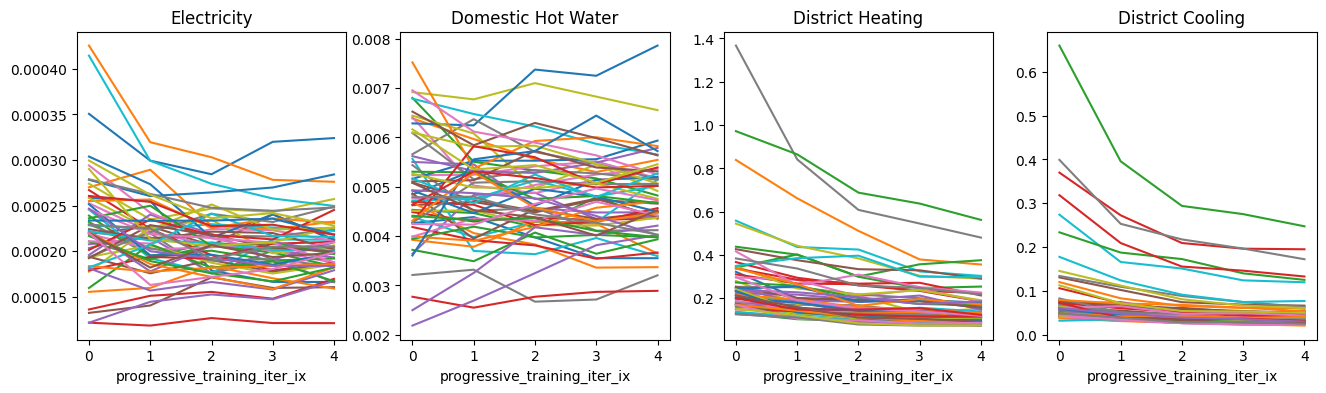

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 4, figsize=(16, 4))
for i, target in enumerate([
    "Electricity",
    "Domestic Hot Water",
    "District Heating",
    "District Cooling",
]):
    maes = (
        df.groupby("progressive_training_iter_ix")
        .mean()["test"]
        .xs("mape", level="metric", axis=1)
        .xs(target, level="target", axis=1)
    )
    ax[i].set_title(target)
    maes.plot(legend=False, ax=ax[i])
# plt.ylim(0,1)

feature.semantic.Ventilation
mechanical      85.405135
natural       1245.343866
Name: District Heating, dtype: float64

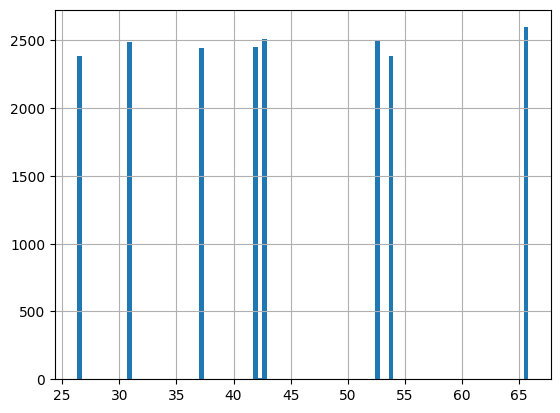

In [ ]:
key = sample_results_files[-1]["Key"]
df = pd.read_parquet(f"s3://{bucket}/{key}")
df["Electricity"].hist(bins=100)
# sorted(df["Electricity"].round(0).values.tolist())
len(df), df["Electricity"].round(0).nunique()
df["Electricity"].groupby(["Typology", "Equipment", "Lighting"]).std()
df["Domestic Hot Water"].groupby(["Typology"]).std()
df["District Heating"].groupby(["feature.semantic.Ventilation"]).std()


In [4]:
params = df.index.to_frame(index=False)
params[[col for col in params.columns if "feature" in col]]

,feature.geometry.long_edge,feature.geometry.short_edge,feature.geometry.orientation,feature.geometry.orientation.cos,feature.geometry.orientation.sin,feature.geometry.aspect_ratio,feature.geometry.rotated_rectangle_area_ratio,feature.geometry.wwr,feature.geometry.height,feature.geometry.num_floors,...,feature.semantic.Lighting,feature.semantic.Typology,feature.semantic.Equipment,feature.semantic.Thermostat,feature.semantic.Age_bracket,feature.semantic.Ventilation,feature.semantic.Conditioning,feature.weather.file,feature.geometry.core_zone_split,feature.geometry.total_conditioned_area
0,8.515469,7.267717,1.962262,-0.381544,0.924351,1.171684,1.001244,0.2,7.0,2,...,LED,MFH,EnergyStar_equipment,NoControls,new,mechanical,NGBoiler,USA_MA_Nantucket.Meml.AP.725060_TMYx.2004-2018...,by_storey,200.0
1,8.328702,7.465451,1.474875,0.095774,0.995403,1.115633,1.000747,0.2,7.0,2,...,NoLED,SFH,EnergyStar_equipment,Controls,old,natural,NGBoiler,USA_MA_Nantucket.Meml.AP.725060_TMYx.2004-2018...,by_storey,200.0
2,13.657214,11.575302,-0.422687,0.911990,-0.410212,1.179858,1.256329,0.2,3.5,1,...,NoLED,MFH,EnergyStar_equipment,NoControls,old,mechanical,ASHP,USA_MA_Nantucket.Meml.AP.725060_TMYx.2004-2018...,by_storey,100.0
3,5.614196,3.090105,-0.671109,0.783132,-0.621855,1.816831,1.000516,0.2,7.0,2,...,LED,MFH,Low_efficiency_equipment,Controls,new,natural,NGBoiler,USA_MA_Nantucket.Meml.AP.725060_TMYx.2004-2018...,by_storey,200.0
4,5.276250,3.404888,1.443926,0.126530,0.991963,1.549610,1.000329,0.2,7.0,2,...,LED,SFH,EnergyStar_equipment,NoControls,old,natural,NGBoiler,USA_MA_Nantucket.Meml.AP.725060_TMYx.2004-2018...,by_storey,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22356,11.325652,8.868434,1.269090,0.297149,0.954831,1.277075,1.000549,0.2,7.0,2,...,LED,MFH,Low_efficiency_equipment,NoControls,old,natural,NGBoiler,USA_NY_Hudson.River.Reserve.997991_TMYx.2004-2...,by_storey,200.0
22357,4.713404,3.692030,0.796155,0.699460,0.714672,1.276643,1.000076,0.2,3.5,1,...,NoLED,MFH,Low_efficiency_equipment,NoControls,old,natural,NGBoiler,USA_NY_Hudson.River.Reserve.997991_TMYx.2004-2...,by_storey,100.0
22358,10.899185,9.550863,0.111967,0.993738,0.111733,1.141173,1.001115,0.2,3.5,1,...,NoLED,SFH,Low_efficiency_equipment,Controls,old,natural,ASHP,USA_NY_Hudson.River.Reserve.997991_TMYx.2004-2...,by_storey,100.0
22359,12.625796,11.814469,1.270176,0.296113,0.955153,1.068672,1.000551,0.2,7.0,2,...,LED,MFH,Low_efficiency_equipment,NoControls,new,mechanical,ASHP,USA_NY_Hudson.River.Reserve.997991_TMYx.2004-2...,by_storey,200.0


In [5]:
from epengine.models.train_sbem import TrainFoldSpec

spec = TrainFoldSpec(
    n_folds=5,
    data_uri=f"s3://{bucket}/{key}",
    stratification_field="feature.weather.file",
    progressive_training_iter_ix=0,
    experiment_id=experiment_id,
    sort_index=0,
)


In [6]:
import numpy as np

train_features, train_targets = spec.train_segment
normalized_features = spec.normalize_params(train_features)
for col in normalized_features.columns:
    try:
        col_vals = normalized_features[col].values.astype(float)
        district_heating = train_targets["District Heating"].values
        correlation = np.corrcoef(col_vals, district_heating)[0, 1]
        print(f"{col}: {correlation}")
    except Exception as e:
        print(type(col_vals))
        print(f"{col} ERROR {e}")


feature.geometry.long_edge: 0.45134511121334664
feature.geometry.short_edge: 0.4160867138403267
feature.geometry.orientation: -0.008150511428914292
feature.geometry.orientation.cos: 0.006745750079242493
feature.geometry.orientation.sin: -0.006468436501823885
feature.geometry.aspect_ratio: 0.10841309991016762
feature.geometry.rotated_rectangle_area_ratio: 0.3225660467596
feature.geometry.wwr: nan
feature.geometry.height: 0.09891181905534845
feature.geometry.num_floors: 0.09891181905534845
feature.geometry.f2f_height: nan
feature.geometry.shading_mask_00: -0.061908698341417136
feature.geometry.shading_mask_01: -0.061527884844491273
feature.geometry.shading_mask_02: -0.05849185828508694
feature.geometry.shading_mask_03: -0.054279405114215765
feature.geometry.shading_mask_04: -0.056264048771204764
feature.geometry.shading_mask_05: -0.05899605779812245
feature.geometry.shading_mask_06: -0.060876708843662496
feature.geometry.shading_mask_07: -0.05927644048623243
feature.geometry.shading_mask

E:\repos\epengine\epengine\models\train_sbem.py:647: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.0625 0.     0.     ... 0.     0.     0.0625]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  fparams.loc[:, col] = (fparams.loc[:, col] - min_val) / (
E:\repos\epengine\epengine\models\train_sbem.py:652: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fparams[col] = pd.Categorical(
e:\repos\epengine\.venv\lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
e:\repos\epengine\.venv\lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invali

In [7]:
train_targets.groupby("feature.semantic.Ventilation").mean()

ColumnName,Electricity,District Cooling,District Heating,Domestic Hot Water
feature.semantic.Ventilation,,,,
mechanical,71.596615,121.292206,269.384037,2.492514
natural,73.469353,82.293845,1862.521647,2.542649


In [17]:
import xgboost as xgb

xgb_hyperparams = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "max_depth": 5,  # 7
    "eta": 0.1,
    "min_child_weight": 3,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    # "alpha": 0.01,
    # "lambda": 0.01,
    # "gamma": 0.01,
}

train_features, train_targets = spec.train_segment
test_features, test_targets = spec.test_segment
train_features_norm = spec.normalize_params(train_features)
test_features_norm = spec.normalize_params(test_features)

train_dmatrix = xgb.DMatrix(train_features_norm, label=train_targets["Electricity"])
test_dmatrix = xgb.DMatrix(test_features_norm, label=test_targets["Electricity"])

model = xgb.train(
    xgb_hyperparams,
    train_dmatrix,
    num_boost_round=2000,
    evals=[(test_dmatrix, "eval")],
    early_stopping_rounds=20,
)


[0]	eval-rmse:228.14622
[1]	eval-rmse:215.45155
[2]	eval-rmse:212.17242
[3]	eval-rmse:209.25282
[4]	eval-rmse:205.90773
[5]	eval-rmse:203.50174
[6]	eval-rmse:202.60870
[7]	eval-rmse:202.08857
[8]	eval-rmse:200.75208
[9]	eval-rmse:200.44343
[10]	eval-rmse:201.43685
[11]	eval-rmse:201.93115
[12]	eval-rmse:202.90982
[13]	eval-rmse:205.56195
[14]	eval-rmse:199.42178
[15]	eval-rmse:200.28867
[16]	eval-rmse:200.13317
[17]	eval-rmse:194.88247
[18]	eval-rmse:194.23247
[19]	eval-rmse:191.95515
[20]	eval-rmse:193.36530
[21]	eval-rmse:193.56208
[22]	eval-rmse:190.68066


E:\repos\epengine\epengine\models\train_sbem.py:647: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.0625 0.     0.     ... 0.     0.     0.0625]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  fparams.loc[:, col] = (fparams.loc[:, col] - min_val) / (
E:\repos\epengine\epengine\models\train_sbem.py:652: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fparams[col] = pd.Categorical(
E:\repos\epengine\epengine\models\train_sbem.py:647: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.     0.     0.0625 ... 0.     0.0625 0.    ]' has dtype incompatible with int64, plea

[23]	eval-rmse:190.80736
[24]	eval-rmse:186.80992
[25]	eval-rmse:187.41761
[26]	eval-rmse:187.96170
[27]	eval-rmse:187.91765
[28]	eval-rmse:190.35029
[29]	eval-rmse:187.21301
[30]	eval-rmse:188.99917
[31]	eval-rmse:193.84480
[32]	eval-rmse:190.92862
[33]	eval-rmse:190.20412
[34]	eval-rmse:191.37870
[35]	eval-rmse:189.03559
[36]	eval-rmse:189.35430
[37]	eval-rmse:187.31710
[38]	eval-rmse:186.41356
[39]	eval-rmse:186.06600
[40]	eval-rmse:189.82037
[41]	eval-rmse:189.08000
[42]	eval-rmse:193.46556
[43]	eval-rmse:193.95673
[44]	eval-rmse:195.34190
[45]	eval-rmse:197.33793
[46]	eval-rmse:198.02930
[47]	eval-rmse:197.32194
[48]	eval-rmse:201.21413
[49]	eval-rmse:200.16878
[50]	eval-rmse:198.65788
[51]	eval-rmse:198.74073
[52]	eval-rmse:197.49515
[53]	eval-rmse:196.58597
[54]	eval-rmse:195.60347
[55]	eval-rmse:196.40488
[56]	eval-rmse:200.10978
[57]	eval-rmse:202.20512
[58]	eval-rmse:203.75063
[59]	eval-rmse:204.40717


In [29]:
df = pd.read_parquet(f"s3://{bucket}/{key}")
edges = df.index.to_frame(index=False)[["long_edge", "short_edge"]]
((edges["long_edge"] - edges["short_edge"]) > 0).all()


np.True_

In [24]:
train_features["feature.geometry.total_conditioned_area"].unique()

array([ 200.,  100.,  300.,  400.,  500.,  600.,  800.,  900., 1700.,
        700., 1500.])

In [32]:
df_old = pd.read_parquet(
    "s3://ml-for-bem/hatchet/massachusetts/2024_09_30/residential-v2/specs/832ee29a-1a76-4126-9c83-f08171b5899a/832ee29a-1a76-4126-9c83-f08171b5899a_specs_000000.pq"
)
df_old["long_edge"] - df_old["short_edge"]

0       0.278111
1       0.927579
2       9.555403
3       0.196571
4       1.486360
          ...   
2430    7.008161
2431    2.445684
2432    7.705667
2433    2.408675
2434    1.033002
Length: 2435, dtype: float64

In [145]:
import asyncio

from archetypal.idfclass import IDF
from epinterface.geometry import match_idf_to_building_and_neighbors

from epengine.models.shoebox import ShoeboxSimulationSpec

k = 17
spec_old = ShoeboxSimulationSpec(**df_old.iloc[k].to_dict())

f2f_height = 3.5
model = spec_old.configure(f2f_height=f2f_height)
model.geometry.w, model.geometry.d = model.geometry.d, model.geometry.w

# create a global variable to cache the idf
my_idf: IDF | None = None


def post_build_callback(idf: IDF) -> IDF:
    idf = match_idf_to_building_and_neighbors(
        idf,
        building=spec_old.rotated_rectangle,
        neighbor_polys=spec_old.neighbor_polys,  # pyright: ignore [reportArgumentType]
        neighbor_floors=spec_old.neighbor_floors,  # pyright: ignore [reportArgumentType]
        neighbor_f2f_height=f2f_height,
        target_long_length=spec_old.long_edge,
        target_short_length=spec_old.short_edge,
        rotation_angle=spec_old.long_edge_angle,
    )
    global my_idf
    my_idf = idf
    return idf


weather_dir = Path("notebooks") / "weather"
weather_dir.mkdir(parents=True, exist_ok=True)
from epinterface.climate_studio.builder import SimulationPathConfig

temp_dir = Path("cache") / "temptest"
output_dir = Path(temp_dir)
config = (
    SimulationPathConfig(
        output_dir=output_dir,
        weather_dir=weather_dir,
    )
    if weather_dir is not None
    else SimulationPathConfig(output_dir=output_dir)
)

try:
    idf, sql = await asyncio.to_thread(
        model.simulate,
        config=config,
        post_build_callback=post_build_callback,
    )
except Exception as e:
    print(e)


Adding lights to zone with schedule MA_LIGHTS_SCHEDULE.  Make sure this schedule exists.
Ignoring IlluminanceTarget for zone(s) Conditioned_Zones.
Adding people to zone with schedule MA_OCC_SCH.  Make sure this schedule exists.
Ignoring AirspeedSchedule for zone(s) Conditioned_Zones.
Adding equipment to zone with schedule MA_EQUIP_SCHEDULE.  Make sure this schedule exists.
Mechanical ventilation schedule is being ignored in zone Block shoebox Storey 0.
Exception in thread ExpandObjects_Minimal.idf:
Traceback (most recent call last):
  File "C:\tools\Anaconda3\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "e:\repos\epengine\.venv\lib\site-packages\archetypal\eplus_interface\expand_objects.py", line 63, in run
    self.p = subprocess.Popen(
  File "C:\tools\Anaconda3\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\tools\Anaconda3\lib\subprocess.py", line 1440, in _execute_child
    hp, ht, pid

C:\EnergyPlusV22-2-0\energyplus.exe Minimal.idf: 0it [00:00, ?it/s]

e:\repos\epengine\notebooks\cache\temptest\Minimal.idf:
Program Version,EnergyPlus, Version 22.2.0-c249759bad, YMD=2025.03.19 13:24,
   ** Severe  ** HVACTemplate:* objects found. These objects are not supported directly by EnergyPlus.
   **   ~~~   ** You must run the ExpandObjects program on this input.
   **  Fatal  ** Errors occurred on processing input file. Preceding condition(s) cause termination.
   ...Summary of Errors that led to program termination:
   ..... Reference severe error count=1
   ..... Last severe error=HVACTemplate:* objects found. These objects are not supported directly by EnergyPlus.
   ************* Warning:  Node connection errors not checked - most system input has not been read (see previous warning).
   ************* Fatal error -- final processing.  Program exited before simulations began.  See previous error messages.
   ************* EnergyPlus Warmup Error Summary. During Warmup: 0 Warning; 0 Severe Errors.
   ************* EnergyPlus Sizing Error Su

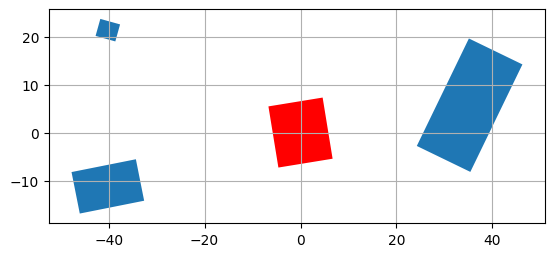

In [146]:
from shapely import from_wkt

rotated_rectangle = from_wkt(spec_old.rotated_rectangle)
neighbor_polys = [from_wkt(poly) for poly in spec_old.neighbor_polys]
import geopandas as gpd
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ne = gpd.GeoSeries(neighbor_polys)
bu = gpd.GeoSeries(rotated_rectangle)
ne.translate(xoff=-bu.iloc[0].centroid.x, yoff=-bu.iloc[0].centroid.y).plot(ax=ax)
bu.translate(xoff=-bu.iloc[0].centroid.x, yoff=-bu.iloc[0].centroid.y).plot(
    ax=ax, color="red"
)
ax.grid()

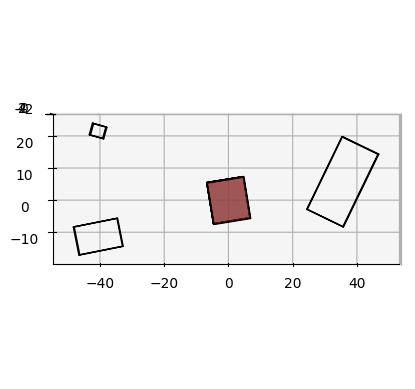

In [147]:
from geomeppy.view_geometry import _get_collection, _get_surfaces

surfaces = _get_surfaces(my_idf)
# set up the collections
walls = _get_collection("wall", surfaces, 0.5, facecolor="lightyellow")
floors = _get_collection("floor", surfaces, 0.5, facecolor="dimgray")
roofs = _get_collection("roof", surfaces, 0.5, facecolor="firebrick")
windows = _get_collection("window", surfaces, 0.5, facecolor="cornflowerblue")
shading = _get_collection("shading", surfaces, 1, facecolor="darkolivegreen")

ax = plt.axes(projection="3d")
ax.add_collection3d(floors)
ax.add_collection3d(walls)
ax.add_collection3d(roofs)
ax.add_collection3d(windows)
ax.add_collection3d(shading)
ax.view_init(elev=90, azim=-90)
ax.set_aspect("equal")
# set the view to be in plane, i.e. from above


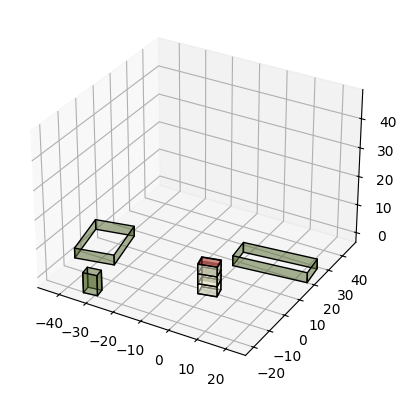

In [136]:
fig, ax = my_idf.view_model()
